In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv("kyphosis.csv")
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


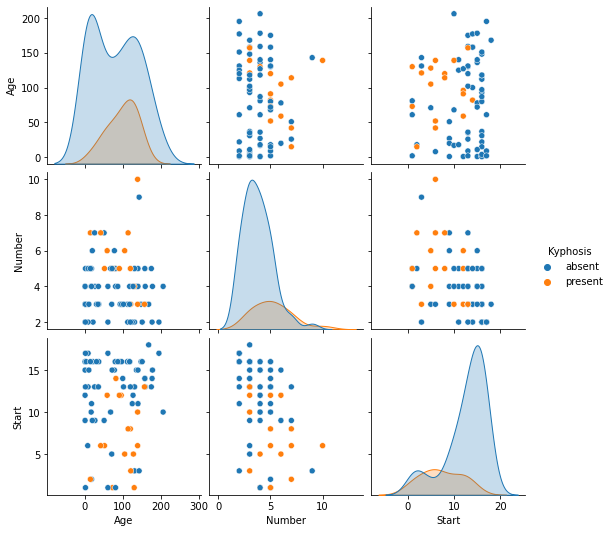

In [5]:
sns.pairplot(df,hue='Kyphosis')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x = df.drop('Kyphosis', axis=1)
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [8]:
y = df['Kyphosis']
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3 )

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtree = DecisionTreeClassifier()

In [12]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred = dtree.predict(x_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(confusion_matrix(y_test,y_pred))

[[15  3]
 [ 6  1]]


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      absent       0.71      0.83      0.77        18
     present       0.25      0.14      0.18         7

    accuracy                           0.64        25
   macro avg       0.48      0.49      0.48        25
weighted avg       0.58      0.64      0.60        25



In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=200)

In [19]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [20]:
rfc_pred = rfc.predict(x_test)

In [21]:
print(confusion_matrix(y_test, rfc_pred))

[[18  0]
 [ 7  0]]


In [22]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.72      1.00      0.84        18
     present       0.00      0.00      0.00         7

    accuracy                           0.72        25
   macro avg       0.36      0.50      0.42        25
weighted avg       0.52      0.72      0.60        25



C:\Users\ril\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ril\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ril\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [24]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

# Tree Visualisation

In [25]:
import six
import sys
sys.modules['sklearn.externals.six'] = six


In [27]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

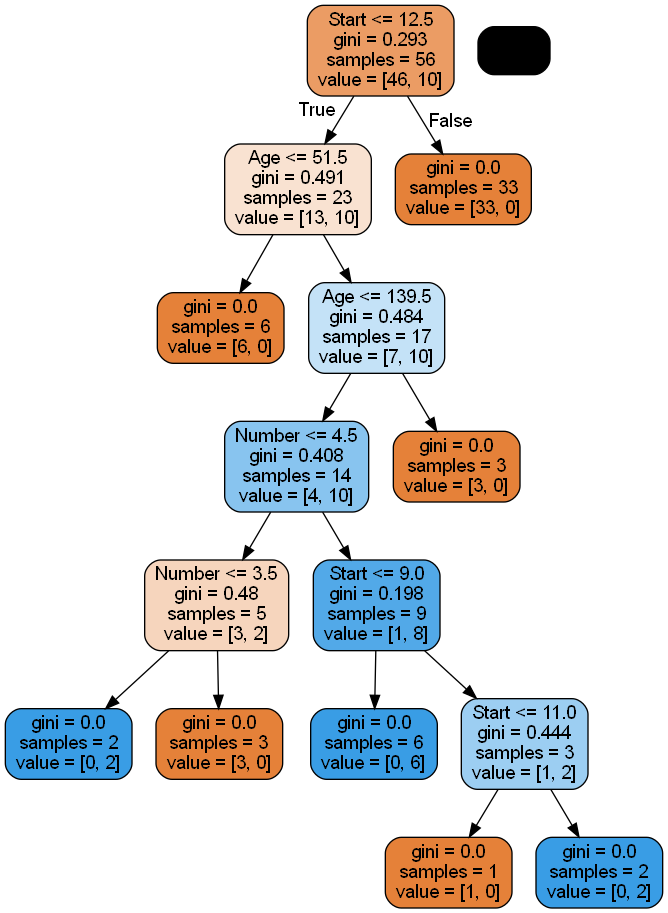

In [28]:
dot_data = StringIO()
export_graphviz(dtree, out_file = dot_data, feature_names= features, filled =True, rounded= True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())